In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,roc_auc_score,make_scorer
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [4]:
pd.set_option("display.max_columns",None)

In [5]:
data=pd.read_csv("diabetes.csv")

In [6]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [7]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [8]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [10]:
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [11]:
x=data['Outcome']
y=data.drop(['Outcome'],axis=1)

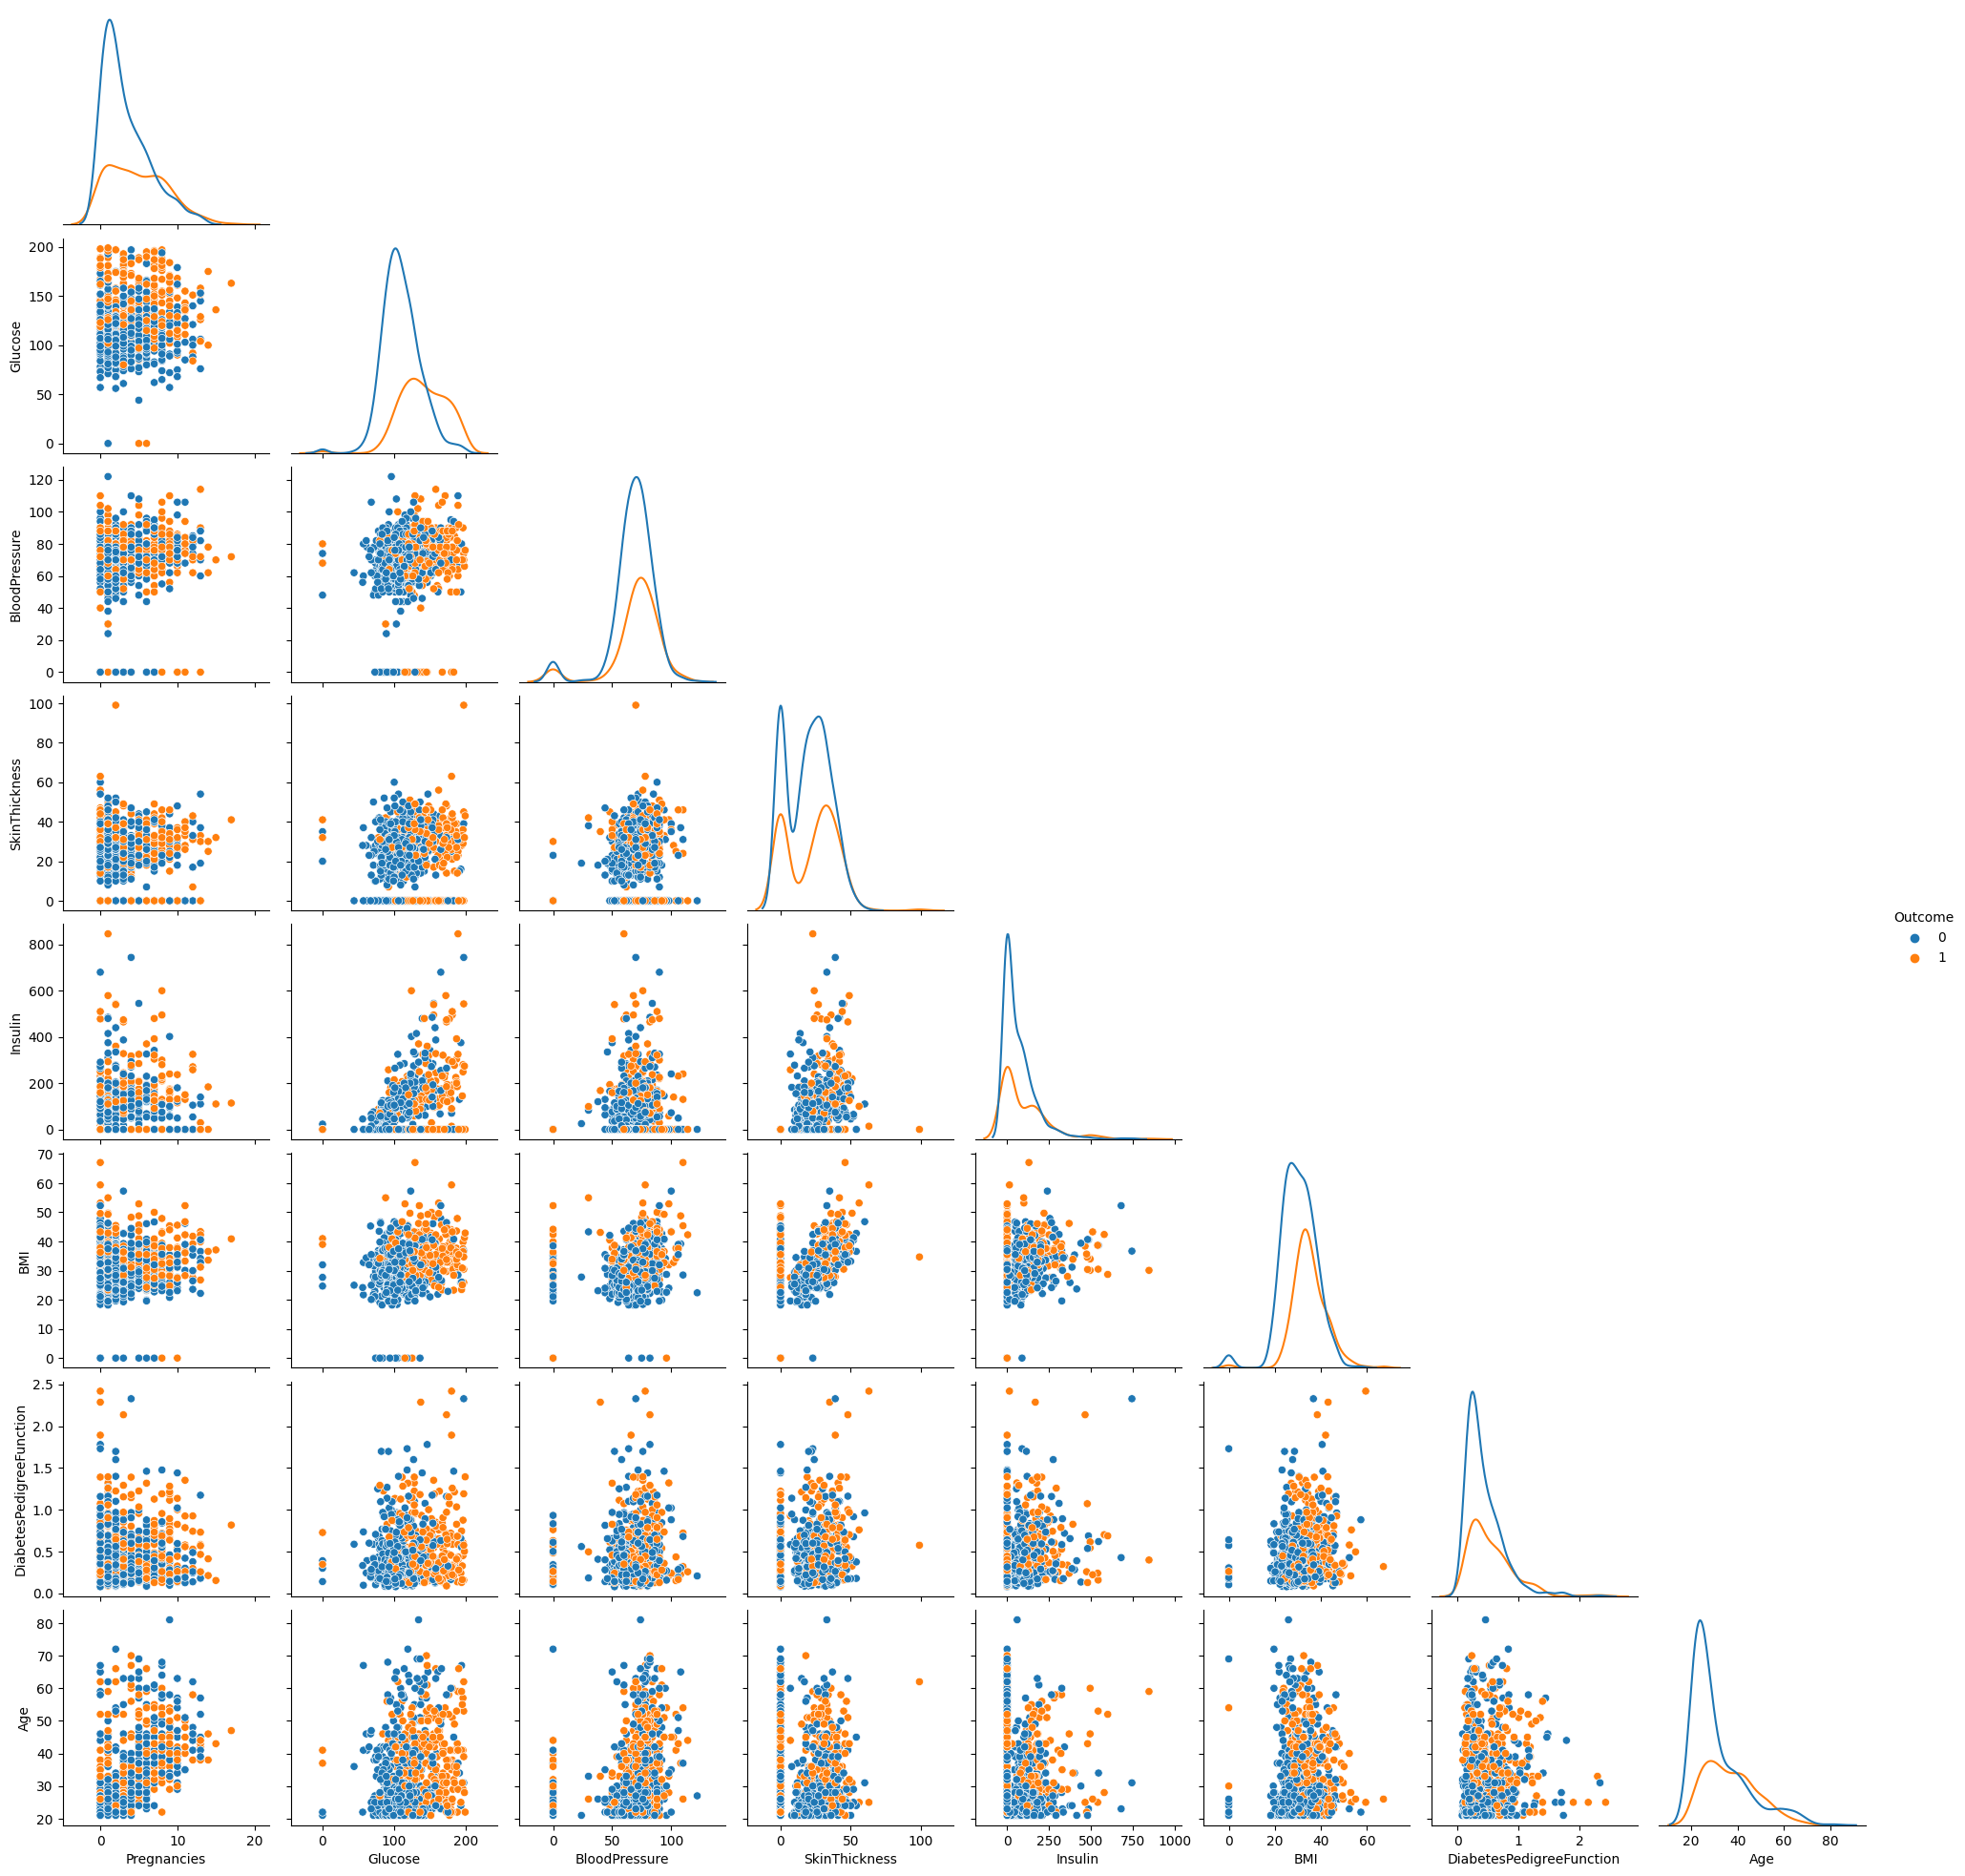

In [12]:
sns.pairplot(data,hue="Outcome",diag_kws=dict(fill=False),corner=True)

In [13]:
data.groupby(['Outcome']).mean().T

Outcome,0,1
Pregnancies,3.298000,4.865672
Glucose,109.980000,141.257463
BloodPressure,68.184000,70.824627
SkinThickness,19.664000,22.164179
Insulin,68.792000,100.335821
BMI,30.304200,35.142537
DiabetesPedigreeFunction,0.429734,0.550500
Age,31.190000,37.067164


In [14]:
y=data['Outcome']
x=data.drop(['Outcome'],axis=1)

In [15]:
test_data=data.tail(100)

In [16]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [17]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [18]:
x.shape

(768, 8)

In [19]:
y.shape

(768,)

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [21]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((614, 8), (154, 8), (614,), (154,))

In [22]:
from sklearn.linear_model import LogisticRegression
LG=LogisticRegression()
LG.fit(x_train,y_train)
Y_LG=LG.predict(x_test)


C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [23]:
Y_LG

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
      dtype=int64)

In [24]:
from sklearn.metrics import accuracy_score

In [25]:
A=accuracy_score(Y_LG,y_test)

In [26]:
A*100

82.46753246753246

In [27]:
from sklearn.metrics import precision_score,recall_score,f1_score,recall_score
def metrics(actuals,predictions):
    print("Accuracy:{:.5f}".format(accuracy_score(actuals,predictions)))
    print("Accuracy:{:.5f}".format(precision_score(actuals,predictions)))
    print("Accuracy:{:.5f}".format(f1_score(actuals,predictions)))
    print("Accuracy:{:.5f}".format(recall_score(actuals,predictions)))

In [28]:
metrics(y_test,Y_LG.round())

Accuracy:0.82468
Accuracy:0.76316
Accuracy:0.68235
Accuracy:0.61702


In [29]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,Y_LG)

array([[98,  9],
       [18, 29]], dtype=int64)

In [30]:
from sklearn.tree import DecisionTreeClassifier

In [31]:
deci=DecisionTreeClassifier()

In [32]:
deci.fit(x_train,y_train)
prediction_rf=deci.predict(x_test)

In [33]:
navaaaaaa=deci.score(x_test,y_test)*100
print(navaaaaaa)

75.32467532467533


In [34]:
from sklearn.metrics import precision_score,recall_score,f1_score,recall_score
def metrics(actuals,predictions):
    print("Accuracy:{:.5f}".format(accuracy_score(actuals,predictions)))
    print("Accuracy:{:.5f}".format(precision_score(actuals,predictions)))
    print("Accuracy:{:.5f}".format(f1_score(actuals,predictions)))
    print("Accuracy:{:.5f}".format(recall_score(actuals,predictions)))
    

In [35]:
metrics(y_test,prediction_rf)

Accuracy:0.75325
Accuracy:0.59184
Accuracy:0.60417
Accuracy:0.61702


In [36]:
from sklearn.ensemble import RandomForestClassifier
random_forest=RandomForestClassifier(n_estimators=100)

In [37]:
random_forest.fit(x_train,y_train)

RandomForestClassifier()

In [38]:
prediction_rf=random_forest.predict(x_test)

In [39]:
random_forest_score=random_forest.score(x_test,y_test)*100

In [40]:
print(random_forest_score)

81.16883116883116


from sklearn.metrics import precision_score,recall_score,f1_score,recall_score
def metrics(actuals,predictions):
    print("Accuracy:{:.5f}".format(accuracy_score(actuals,predictions)))
    print("Accuracy:{:.5f}".format(precision_score(actuals,predictions)))
    print("Accuracy:{:.5f}".format(f1_score(actuals,predictions)))
    print("Accuracy:{:.5f}".format(recall_score(actuals,predictions)))

In [41]:
from sklearn.svm import SVC
model=SVC(kernel='rbf')
model.fit(x_train,y_train)

SVC()

In [47]:
y_pred=model.predict(x_test)
print("Test set score: {:.2f}".format(model.score(x_test, y_test)*100))

Test set score: 79.22


In [48]:
from sklearn.metrics import precision_score,recall_score,f1_score,recall_score
def metrics(actuals,predictions):
    print("Accuracy:{:.5f}".format(accuracy_score(actuals,predictions)))
    print("Accuracy:{:.5f}".format(precision_score(actuals,predictions)))
    print("Accuracy:{:.5f}".format(f1_score(actuals,predictions)))
    print("Accuracy:{:.5f}".format(recall_score(actuals,predictions)))

In [50]:
metrics(y_test,y_pred)

Accuracy:0.79221
Accuracy:0.72727
Accuracy:0.60000
Accuracy:0.51064
